In [1]:
import pandas as pd

# List of CSV file paths
csv_files = [
    '/Users/srimukund/Desktop/transportation/trans_2022-08-25.csv',
    '/Users/srimukund/Desktop/transportation/trans_2022-08-26.csv',
    '/Users/srimukund/Desktop/transportation/trans_2022-08-27.csv',
    '/Users/srimukund/Desktop/transportation/trans_2022-08-28.csv',
    '/Users/srimukund/Desktop/transportation/trans_2022-08-29.csv',
    '/Users/srimukund/Desktop/transportation/trans_2022-08-30.csv',
    '/Users/srimukund/Desktop/transportation/trans_2022-08-31.csv',
    '/Users/srimukund/Desktop/transportation/trans_202208_caid.csv',
    '/Users/srimukund/Desktop/transportation/trans_home_2022-08-25.csv',
    '/Users/srimukund/Desktop/transportation/trans_home_2022-08-26.csv',
    '/Users/srimukund/Desktop/transportation/trans_home_2022-08-27.csv',
    '/Users/srimukund/Desktop/transportation/trans_home_2022-08-28.csv',
    '/Users/srimukund/Desktop/transportation/trans_home_2022-08-29.csv',
    '/Users/srimukund/Desktop/transportation/trans_home_2022-08-30.csv',
    '/Users/srimukund/Desktop/transportation/trans_home_2022-08-31.csv',
    '/Users/srimukund/Desktop/transportation/trans_home_panel_202208.csv',
    '/Users/srimukund/Desktop/transportation/trans_pois.csv'
]

# Load the first file as an example
example_file = csv_files[0]
data = pd.read_csv(example_file)

# Display the first few rows and the columns
print(data.head())  # Show the first 5 rows
print(data.columns)  # Show column names


     utc_date             placekey                    location_name  \
0  2022-08-25  zzw-222@63j-cyx-5mk              Amazon Distribution   
1  2022-08-25  zzw-222@5z4-kp9-n89            Redlands Muni Airport   
2  2022-08-25  222-222@5z6-3bk-h89  Lineage Logistics Port Location   
3  2022-08-25  zzy-222@5z5-sqh-bhq            Cody Moving & Storage   
4  2022-08-25  zzy-222@5pv-yy3-pqf                   Calumet Harbor   

   naics_code         street_address          city  state  census_block_group  \
0      493110    1155 worldwide blvd  francisville    NaN        210150704012   
1      488119  redlands muni airport      redlands    NaN         60710084011   
2      493120             900 e m st    wilmington    NaN         60372946203   
3      484210           765 tawny ct     oceanside    NaN         60730185142   
4      488310         calumet harbor       calumet    NaN        170314601001   

   local_timestamp                                               caid id_type  \
0    

In [2]:
# Basic statistics for numeric columns
print(data.describe())

# Check for missing values in each column
print(data.isnull().sum())

# Frequency counts for 'top_category'
top_category_counts = data['top_category'].value_counts()
print(top_category_counts)

# Convert 'utc_date' to datetime and extract day of the week
data['utc_date'] = pd.to_datetime(data['utc_date'])
data['day_of_week'] = data['utc_date'].dt.day_name()

# Frequency counts for days of the week
day_counts = data['day_of_week'].value_counts()
print(day_counts)


          naics_code  state  census_block_group  local_timestamp  \
count  372671.000000    0.0        3.726710e+05     3.726710e+05   
mean   458648.613112    NaN        2.864566e+11     1.661419e+09   
std    117174.084486    NaN        1.613385e+11     2.225356e+04   
min       483.000000    NaN        1.001020e+10     1.661350e+09   
25%    488119.000000    NaN        1.302101e+11     1.661408e+09   
50%    488119.000000    NaN        2.903706e+11     1.661423e+09   
75%    488410.000000    NaN        4.400398e+11     1.661435e+09   
max    493190.000000    NaN        7.803096e+11     1.661457e+09   

            zip_code  minimum_dwell  
count  372671.000000  372671.000000  
mean    51854.425262     121.223170  
std     28743.212162     207.580256  
min       603.000000       4.000000  
25%     30144.000000      12.000000  
50%     49090.000000      35.000000  
75%     77064.000000     126.000000  
max     99928.000000    1440.000000  
utc_date                   0
placekey        

In [3]:
# Example: Frequency counts for 'top_category'
top_category_counts = data['top_category'].value_counts()
print(top_category_counts)


Support Activities for Air Transportation                  158268
Specialized Freight Trucking                                37508
Warehousing and Storage                                     35619
Support Activities for Road Transportation                  31843
Postal Service                                              30062
Couriers and Express Delivery Services                      24209
Support Activities for Water Transportation                 16959
Transit and Ground Passenger Transportation                 15156
Taxi and Limousine Service                                   7233
Rail Transportation                                          5782
Scenic and Sightseeing Transportation                        3764
Other Transit and Ground Passenger Transportation            3241
Freight Transportation Arrangement                            935
General Freight Trucking                                      907
Interurban and Rural Bus Transportation                       722
Water Tran

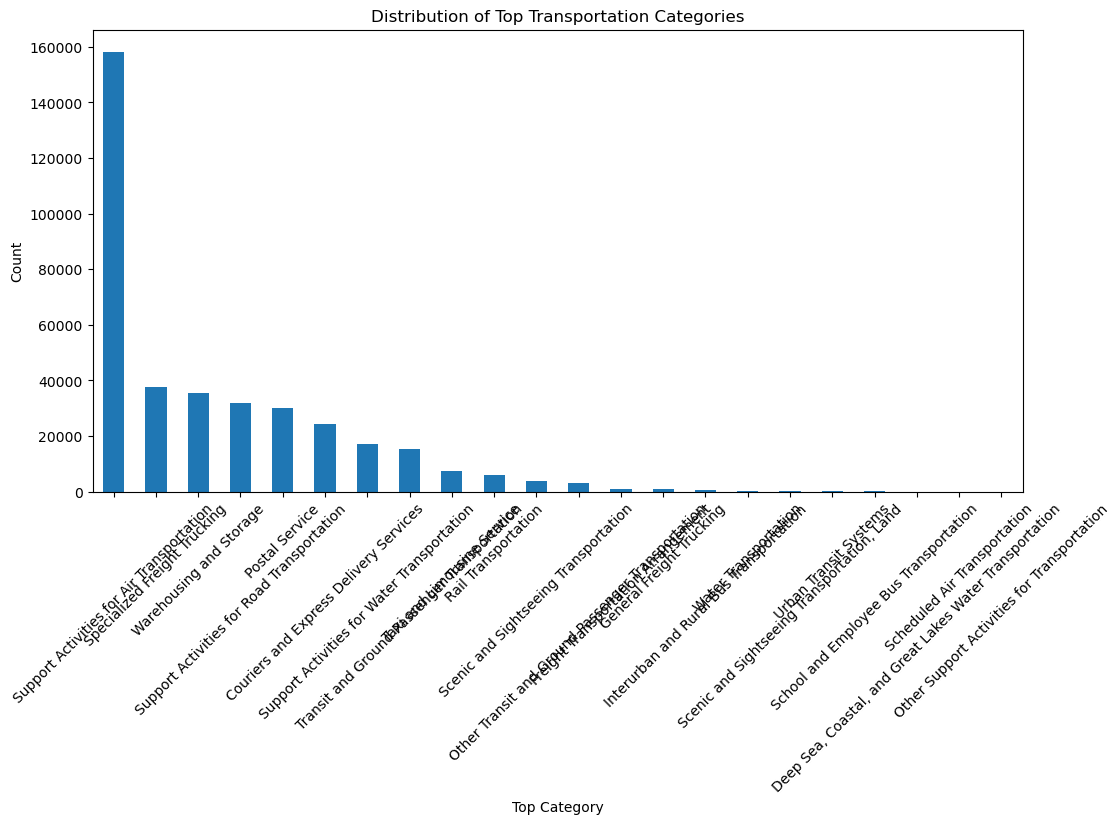

In [4]:
import matplotlib.pyplot as plt

top_category_counts = data['top_category'].value_counts()
top_category_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Top Transportation Categories')
plt.xlabel('Top Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


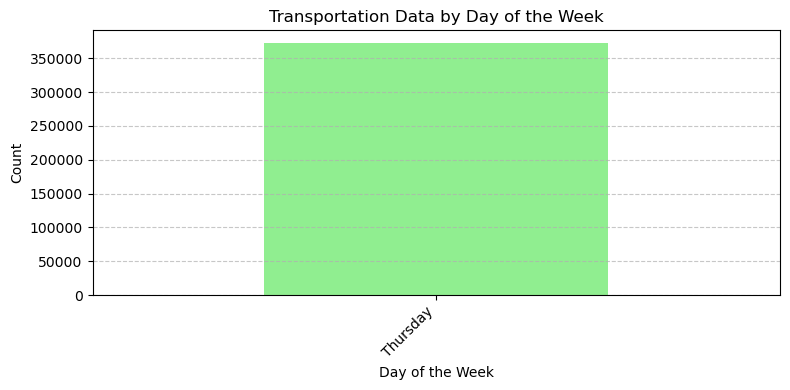

In [5]:
# Convert utc_date to datetime
data['utc_date'] = pd.to_datetime(data['utc_date'])
data['day_of_week'] = data['utc_date'].dt.day_name()

# Group by day of week
day_of_week_counts = data['day_of_week'].value_counts()

# Bar chart for days of the week
plt.figure(figsize=(8, 4))
day_of_week_counts.plot(kind='bar', color='lightgreen')
plt.title('Transportation Data by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [6]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Example: Create a geospatial plot if you have location data
# Ensure to convert your data into a GeoDataFrame with coordinates


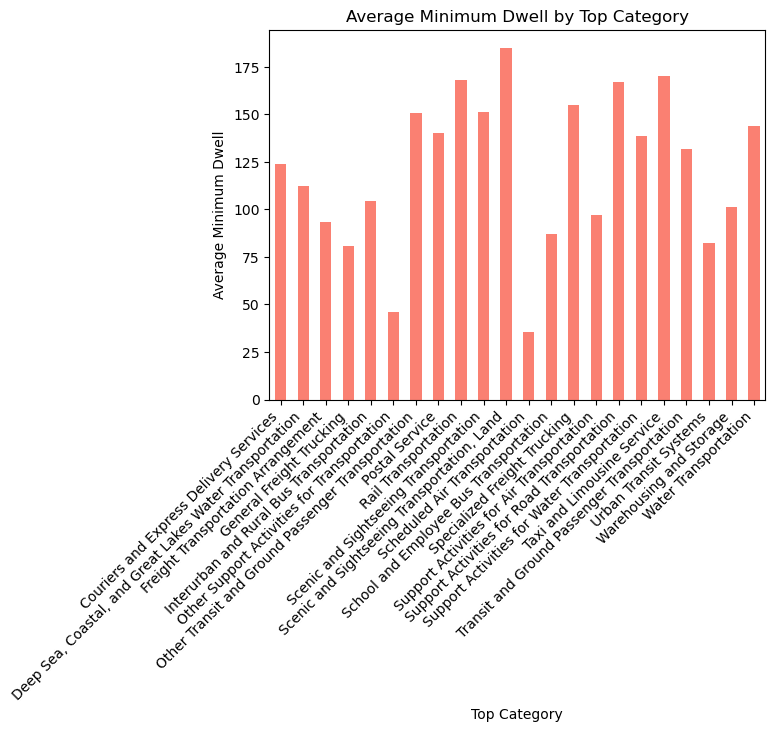

In [7]:
average_dwell = data.groupby('top_category')['minimum_dwell'].mean()
average_dwell.plot(kind='bar', color='salmon')
plt.title('Average Minimum Dwell by Top Category')
plt.xlabel('Top Category')
plt.ylabel('Average Minimum Dwell')
plt.xticks(rotation=45, ha='right')
plt.show()


In [8]:
import scipy.stats as stats

# Example: T-test between two categories
category1 = data[data['top_category'] == 'Warehousing and Storage']['minimum_dwell']
category2 = data[data['top_category'] == 'Support Activities for Air Transportation']['minimum_dwell']

t_stat, p_value = stats.ttest_ind(category1.dropna(), category2.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 4.411874426862276, P-value: 1.0253467248115421e-05


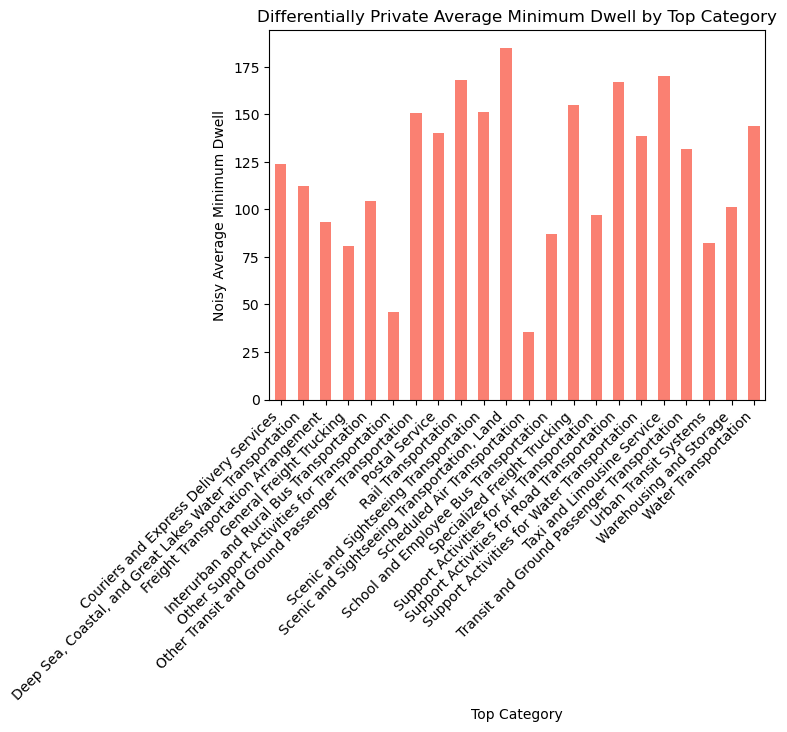

In [9]:
import numpy as np

# Define the privacy budget (epsilon) and sensitivity
epsilon = 1.0  # Adjust based on the desired privacy level
sensitivity = data['minimum_dwell'].std() / len(data)  # Approximate sensitivity

# Calculate the noisy average dwell times by top category
average_dwell = data.groupby('top_category')['minimum_dwell'].mean()

# Add Laplace noise
noisy_average_dwell = average_dwell + np.random.laplace(0, sensitivity / epsilon, size=average_dwell.shape)

# Plot the noisy data
noisy_average_dwell.plot(kind='bar', color='salmon')
plt.title('Differentially Private Average Minimum Dwell by Top Category')
plt.xlabel('Top Category')
plt.ylabel('Noisy Average Minimum Dwell')
plt.xticks(rotation=45, ha='right')
plt.show()


In [10]:
# Adding noise to each value in the groups for DP
category1_noisy = category1 + np.random.laplace(0, sensitivity / epsilon, size=category1.shape)
category2_noisy = category2 + np.random.laplace(0, sensitivity / epsilon, size=category2.shape)

# Perform the t-test with noisy data
t_stat, p_value = stats.ttest_ind(category1_noisy.dropna(), category2_noisy.dropna())
print(f"Differentially Private T-statistic: {t_stat}, P-value: {p_value}")


Differentially Private T-statistic: 4.411869110981699, P-value: 1.025371902633985e-05


In [11]:
pip install scikit-mobility


Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from skmob import TrajDataFrame

# Load the main data file and the file with latitude and longitude information
data = pd.read_csv('/Users/srimukund/Desktop/transportation/trans_2022-08-25.csv')
pois_data = pd.read_csv('/Users/srimukund/Desktop/transportation/trans_pois.csv')

# Merge the two datasets on 'placekey' to get latitude and longitude in the main data
merged_data = pd.merge(data, pois_data[['placekey', 'latitude', 'longitude']], on='placekey', how='left')

# Drop rows with missing latitude or longitude values
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])

# Convert the 'utc_date' column to datetime format
merged_data['utc_date'] = pd.to_datetime(merged_data['utc_date'])

# Create a TrajDataFrame with the cleaned data
traj_data = TrajDataFrame(merged_data, timestamp=True, latitude='latitude', longitude='longitude', datetime='utc_date')

# Plot the trajectories
traj_data.plot_trajectory(start_end_markers=True)



/var/folders/7z/5l84624128j6ysl2q8m6_68r0000gn/T/ipykernel_12797/3718748565.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  pois_data = pd.read_csv('/Users/srimukund/Desktop/transportation/trans_pois.csv')
/opt/anaconda3/envs/mobility_env/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/opt/anaconda3/envs/mobility_env/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style

In [18]:
import pandas as pd
from skmob import TrajDataFrame

# Load the main data file and the file with latitude and longitude information
data = pd.read_csv('/Users/srimukund/Desktop/transportation/trans_2022-08-25.csv')
pois_data = pd.read_csv('/Users/srimukund/Desktop/transportation/trans_pois.csv')

# Merge the two datasets on 'placekey' to get latitude and longitude in the main data
merged_data = pd.merge(data, pois_data[['placekey', 'latitude', 'longitude']], on='placekey', how='left')

# Drop rows with missing latitude or longitude values
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])

# Convert the 'utc_date' column to datetime format
merged_data['utc_date'] = pd.to_datetime(merged_data['utc_date'])

# Find the top 5 categories based on frequency counts
top_categories = merged_data['top_category'].value_counts().head(5).index

# Limit the number of trajectories to plot for each category
num_samples = 10  # Adjust the sample size as needed

# Plot trajectories for each top category and save to HTML files
for category in top_categories:
    # Filter data for the current category
    category_data = merged_data[merged_data['top_category'] == category]
    
    # Randomly sample trajectories to limit the output
    category_sampled_data = category_data.sample(n=num_samples, random_state=1) if len(category_data) > num_samples else category_data
    
    # Create a new TrajDataFrame for the sampled data
    traj_data = TrajDataFrame(category_sampled_data, timestamp=True, latitude='latitude', longitude='longitude', datetime='utc_date')
    
    # Plot the trajectory for the sampled category data and save to an HTML file
    print(f"Plotting and saving for category: {category}")
    map_f = traj_data.plot_trajectory(start_end_markers=True, max_users=num_samples)
    map_f.save(f"{category}_trajectory_sampled.html")



/var/folders/7z/5l84624128j6ysl2q8m6_68r0000gn/T/ipykernel_12797/1452178986.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  pois_data = pd.read_csv('/Users/srimukund/Desktop/transportation/trans_pois.csv')


Plotting and saving for category: Support Activities for Air Transportation
Plotting and saving for category: Warehousing and Storage
Plotting and saving for category: Specialized Freight Trucking
Plotting and saving for category: Support Activities for Road Transportation
Plotting and saving for category: Postal Service


/opt/anaconda3/envs/mobility_env/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/opt/anaconda3/envs/mobility_env/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/opt/anaconda3/envs/mobility_env/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(se

In [15]:
!pip install scikit-mobility
